In [22]:
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [23]:
X, y = mglearn.datasets.make_wave(n_samples=60)

In [24]:
y

array([-1.18073311,  0.50015912,  0.13772889,  1.17396178, -1.32035898,
       -2.37364735, -0.70117304,  1.20319981,  0.29262945,  0.44971554,
       -0.48647165,  1.39515571,  1.0738403 , -1.30838148, -1.27708305,
       -0.94575843, -0.32691082,  0.26134393, -1.25635546, -0.74646948,
        0.96250584, -0.75240909, -0.17851354,  0.13368988, -0.38575444,
        0.79900059, -1.11948406,  0.97923163,  0.65823236, -0.08137001,
       -0.72142625, -1.0767626 , -0.83684971,  0.70945882,  0.95081838,
        0.38109799, -0.19612826, -0.9139074 ,  0.81263817, -0.93416482,
       -1.7113156 , -0.32309571, -0.44713127,  1.19812891, -0.75150632,
        0.40012342, -0.02565504,  0.77613985,  0.23938228, -1.58831973,
        0.73141352,  0.25092544,  1.01581268,  1.28948157,  0.65213403,
        0.82614241, -1.7240941 , -1.54664568, -1.03731593, -0.49131681])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
model=Ridge(alpha=1) #alpha값 지정해줘야함.
#model = LinearRegression() Ridge import 안했으면 이걸로 써야함
model.fit(X_train,y_train)

Ridge(alpha=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
model=Lasso(alpha=0.1)
model.fit(X_train,y_train)

Lasso(alpha=0.1)

In [27]:
model.score(X_test,y_test) #r_scorer값 : 높을 수록 좋다.

0.7116537911993559

In [28]:
model.coef_ #회귀계수출력, array로 나오는 이유는? 다항회귀가 되기 때문에

array([0.40890668])

In [29]:
model.intercept_ #y절편출력

-0.02464192453984297

In [30]:
model.intercept_

-0.02464192453984297

In [31]:
for i in X_test:
    print(model.coef_*i+model.intercept_)

[-0.7614743]
[0.73199249]
[-0.45318349]
[0.20209168]
[1.12825373]
[0.54454131]
[1.11775836]
[-1.14039951]
[-0.95194846]
[-0.53460257]
[-0.86857957]
[-1.20085913]
[0.23921292]
[-0.03647509]
[1.07667184]


In [32]:
import matplotlib.pyplot as plt

In [33]:
model.predict(X_test)

array([-0.7614743 ,  0.73199249, -0.45318349,  0.20209168,  1.12825373,
        0.54454131,  1.11775836, -1.14039951, -0.95194846, -0.53460257,
       -0.86857957, -1.20085913,  0.23921292, -0.03647509,  1.07667184])

In [34]:
[model.coef_*x+model.intercept_ for x in X_test]

[array([-0.7614743]),
 array([0.73199249]),
 array([-0.45318349]),
 array([0.20209168]),
 array([1.12825373]),
 array([0.54454131]),
 array([1.11775836]),
 array([-1.14039951]),
 array([-0.95194846]),
 array([-0.53460257]),
 array([-0.86857957]),
 array([-1.20085913]),
 array([0.23921292]),
 array([-0.03647509]),
 array([1.07667184])]

model.predict(X_test) 랑 [model.coef_*x+model.intercept_ for x in X_test] 같은
결과가 나오는 이유는?
회귀분석식 : y=0.44(coef값)x(X_test)-0.017(y절편) -> mse 0.69나옴

즉, predict를 하는 값과 수식에 대입해서 계산하는 결과가 같게 나옴. 

In [35]:
X_test

array([[-1.80195731],
       [ 1.85038409],
       [-1.04801802],
       [ 0.55448741],
       [ 2.81945911],
       [ 1.39196365],
       [ 2.7937922 ],
       [-2.72863627],
       [-2.26777059],
       [-1.24713211],
       [-2.06388816],
       [-2.87649303],
       [ 0.64526911],
       [-0.02893854],
       [ 2.69331322]])

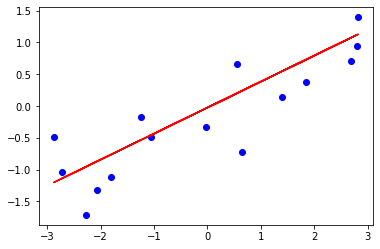

In [36]:
plt.plot(X_test,[model.coef_*x+model.intercept_ for x in X_test],c="r")
plt.scatter(X_test, y_test,c="b")

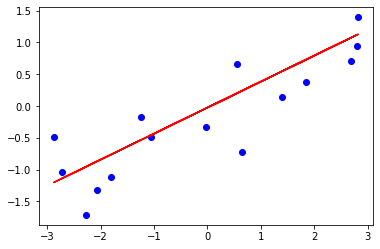

In [37]:
plt.plot(X_test,model.predict(X_test),c="r")
plt.scatter(X_test, y_test,c="b")